# 소모둠 3회차 활동

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.random.seed(42)

C:\Users\User\AppData\Local\Temp\ipykernel_7692\3147407450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. 오차막대(Errorbar)
하나의 실험 결과값(y)에 대한 범위를 시각적으로 나타내기 위해 사용

In [2]:
x = np.linspace(0,10,50)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

[ 0.09934283  0.17501508  0.52646186  0.87931201  0.68180411  0.80549418
  1.25647535  1.14339002  0.9041926   1.07335832  0.79887569  0.68812207
  0.68694277  0.08667356 -0.06435417 -0.03217583 -0.32596436 -0.25910685
 -0.68875652 -0.95375853 -0.51445194 -0.9555022  -0.96182265 -1.28477831
 -1.09170775 -0.90285685 -1.05905645 -0.62313279 -0.65883303 -0.41511799
 -0.28038641  0.41378737  0.24221063  0.22478124  0.77413618  0.51345969
  0.91595702  0.56252317  0.72947818  1.03384361  1.10024516  0.90537036
  0.73035707  0.54438258  0.13492147  0.09480647 -0.05511335  0.04514165
 -0.29395477 -0.89662914]


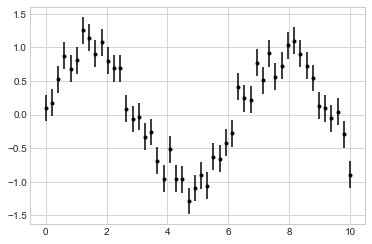

In [3]:
dy = 0.2
y = np.sin(x) + dy * np.random.randn(50)
print(y)
plt.errorbar(x , y , yerr=dy , fmt='.k')
plt.show()

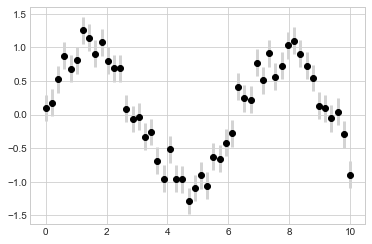

In [4]:
plt.errorbar(x , y , yerr=dy, fmt='o',color='black', ecolor='lightgray', elinewidth=3 , capsize=0)
plt.show()

## 2. 화살표와 주석

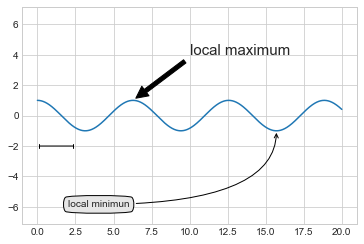

In [5]:
fig , ax = plt.subplots()
x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))

ax.axis('equal')

ax.annotate("local maximum", xy=(6.28,1),fontsize=15, xytext=(10,4) ,arrowprops=dict(facecolor='black' ,shrink=0.05))

ax.annotate("local minimun", xy=(5*np.pi,-1), xytext=(2,-6),bbox= dict(boxstyle='round4,pad=.5',fc='0.9')
            ,arrowprops=dict(arrowstyle='->' , connectionstyle='angle3,angleA=0,angleB=-90'))

ax.annotate("", xy=(2.5,-2),xytext=(0,-2), arrowprops={"arrowstyle": '|-|,widthA=0.2,widthB=0.2'})

plt.show()

## 3. Folium

In [6]:
#pip install folium

In [7]:
#위도 경도 사이트
#http://map.esran.com/ 

#https://www.data.go.kr/data/15083033/fileData.do

In [8]:
import folium
#경상국립대학교 위도 경도
folium.Map(location=[35.15396593936544,128.09881893149577], zoom_start=16)

In [9]:
import folium
#경상국립대학교 위도 경도
m=folium.Map(location=[35.15396593936544,128.09881893149577], zoom_start=16)
tooltip = '354동'
marker = folium.Marker(location=[35.156101347166825,128.09690515678574],
                       popup="354동",
                       tooltip =tooltip
                      )
marker.add_to(m)
m

In [10]:
import json

import requests

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
data = json.loads(requests.get(f"{url}/vis1.json").text)

In [11]:
m=folium.Map(location=[35.15396593936544,128.09881893149577], zoom_start=16)
marker = folium.Marker(
    location=[35.156101347166825,128.09690515678574],
    popup=folium.Popup(max_width=450).add_child(
    folium.Vega(data, width=450, height=250)
    ),
)

marker.add_to(m)

m

In [12]:
m=folium.Map(location=[35.15396593936544,128.09881893149577], zoom_start=16)
marker = folium.CircleMarker(
    location=[35.156101347166825,128.09690515678574],
    radius=50,
    popup="<stong>354동</stong>",
    tooltip=tooltip)
marker.add_to(m)

m

In [13]:
import base64
m = folium.Map(location=[35.15396593936544,128.09881893149577],
               zoom_start=16)
 
pic = base64.b64encode(open('./캡처.PNG','rb').read()).decode()
image_tag = '<img src="data:image/jpeg;base64,{}">'.format(pic)
iframe = folium.IFrame(image_tag, width=300, height=300)
popup = folium.Popup(iframe,max_width=500)
 
folium.Marker([35.15396593936544,128.09881893149577],
              popup=popup,
              tooltip="경상국립대학교").add_to(m)
 
m

In [14]:
m=folium.Map(location=[35.15396593936544,128.09881893149577], zoom_start=16 ,tiles='cartodbpositron')
m

## EDIYA의 전략


In [15]:
# https://www.data.go.kr/data/15083033/fileData.do

In [16]:
#경로 설정해주기
df=pd.read_csv("./소상공인시장진흥공단_상가(상권)정보_경남_202209.csv",encoding='utf-8')
df

C:\Users\User\AppData\Local\Temp\ipykernel_7692\192729525.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./소상공인시장진흥공단_상가(상권)정보_경남_202209.csv",encoding='utf-8')


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25020779,시장부식,NaN,D,소매,D01,음/식료품소매,D01A13,청과물소매,G47214,...,4825011900106690007099187,NaN,"경상남도 김해시 삼안로255번안길 16, (삼방동)",621910,50814,NaN,NaN,NaN,128.909933,35.249401
1,20215402,동큐치킨,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,4827039021101310001067903,NaN,"경상남도 밀양시 청도면 청도로 87, (구기리)",627862,50400,NaN,NaN,NaN,128.623576,35.549846
2,24338973,코오롱생수기,NaN,D,소매,D01,음/식료품소매,D01A01,식료품점,G47219,...,4825011900101790001086935,국제쇼핑타운,"경상남도 김해시 활천로267번길 13, (삼방동, 국제)",621909,50818,NaN,2,NaN,128.908148,35.244033
3,25376872,꽃밭에앉아서,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4833033025100670002000001,NaN,"경상남도 양산시 상북면 상삼2길 2, (상삼리)",626852,50579,NaN,1,NaN,129.060657,35.423480
4,17173993,쏘맥,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,4887025022106120021010627,한들약국,"경상남도 함양군 함양읍 용평1길 3, (용평리)",676805,50039,NaN,NaN,NaN,127.729075,35.520615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166055,18745854,오션크림슨,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4812310100200280002000001,NaN,"경상남도 창원시 성산구 비음로25번길 70-75, (토월동)",642550,51451,NaN,NaN,NaN,128.708055,35.231766
166056,18768436,삼정택배,NaN,F,생활서비스,F08,대행업,F08A03,고객관리대행,N75919,...,4833010300106940001004535,양산신도시뜰안채아파트,"경상남도 양산시 양주로 113, (중부동, 양산신도시주공4단지)",626772,50628,106,NaN,NaN,129.029810,35.336658
166057,18767022,카페밍,NaN,Q,음식,Q12,커피점/카페,Q12A05,사주카페,I56220,...,4822034024115800041044089,NaN,"경상남도 통영시 광도면 죽림2로 76-167, (죽림리)",650829,53016,NaN,1,NaN,128.421182,34.877293
166058,18766402,미더하다,NaN,F,생활서비스,F01,이/미용/건강,F01A03,비만/피부관리,NaN,...,4812112700101470010008222,NaN,"경상남도 창원시 의창구 창이대로321번길 19-2, (봉곡동)",641823,51145,NaN,1,NaN,128.672874,35.247327


In [17]:
print('컬럼 항목 수 :', len(df.columns))
list(df.columns)

컬럼 항목 수 : 39


['상가업소번호',
 '상호명',
 '지점명',
 '상권업종대분류코드',
 '상권업종대분류명',
 '상권업종중분류코드',
 '상권업종중분류명',
 '상권업종소분류코드',
 '상권업종소분류명',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드',
 '시도명',
 '시군구코드',
 '시군구명',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 '지번코드',
 '대지구분코드',
 '대지구분명',
 '지번본번지',
 '지번부번지',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물본번지',
 '건물부번지',
 '건물관리번호',
 '건물명',
 '도로명주소',
 '구우편번호',
 '신우편번호',
 '동정보',
 '층정보',
 '호정보',
 '경도',
 '위도']

In [18]:
print('='*100)
print('상권업종대분류명', set(df['상권업종대분류명']))
print('='*100)
print('상권업종중분류명', set(df['상권업종중분류명']))
print('='*100)

상권업종대분류명 {'생활서비스', '부동산', '음식', '학문/교육', '스포츠', '관광/여가/오락', '소매', '숙박'}
상권업종중분류명 {'분식', '평가/개발/관리', '개인/가정용품수리', '대중목욕탕/휴게', '스포츠/운동', '경마/경륜/성인오락', '가방/신발/액세서리', '무도/유흥/가무', '유아교육', '패스트푸드', '예식/의례/관혼상제', '민박/하숙', '한식', '사진/광학/정밀기기소매', '유아용품', '기타서비스업', '화장품소매', '실내운동시설', '학원-음악미술무용', '애견/애완/동물', '학원-예능취미체육', '학원-창업취업취미', '요가/단전/마사지', '종합소매점', '주택수리', '유흥주점', '운동/경기용품소매', '예술품/골동품/수석/분재', '대행업', '사진', '닭/오리요리', 'PC/오락/당구/볼링등', '부페', '철물/난방/건설자재소매', '놀이/여가/취미', '도서관/독서실', '개인서비스', '물품기기대여', '가전제품소매', '연극/영화/극장', '학원기타', '음식배달서비스', '양식', '일식/수산물', '부동산중개', '가구소매', '가정/주방/인테리어', '학원-자격/국가고시', '페인트/유리제품소매', '중식', '자동차/이륜차', '운영관리시설', '학원-보습교습입시', '중고품소매/교환', '이/미용/건강', '자동차/자동차용품', '장례/묘지', '음/식료품소매', '인력/고용/용역알선', '선물/팬시/기념품', '커피점/카페', '주유소/충전소', '별식/퓨전요리', '건강/미용식품', '세탁/가사서비스', '시계/귀금속소매', '광고/인쇄', '호텔/콘도', '캠프/별장/펜션', '운송/배달/택배', '취미/오락관련소매', '학문교육기타', '의약/의료품소매', '학원-컴퓨터', '의복의류', '학원-어학', '책/서적/도서', '유스호스텔', '법무세무회계', '제과제빵떡케익', '실외운동시설', '분양', '행사/이벤트', '기타음식업', '모텔/여관/여인숙', '기타판매

In [19]:
dataset = df[['상호명','지점명',
              '상권업종대분류명', '상권업종중분류명',
              '시도명', '시군구명', '행정동명',
              '위도', '경도']]

dataset.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,시장부식,NaN,소매,음/식료품소매,경상남도,김해시,삼안동,35.249401,128.909933
1,동큐치킨,NaN,음식,닭/오리요리,경상남도,밀양시,청도면,35.549846,128.623576
2,코오롱생수기,NaN,소매,음/식료품소매,경상남도,김해시,삼안동,35.244033,128.908148
3,꽃밭에앉아서,NaN,음식,커피점/카페,경상남도,양산시,상북면,35.423480,129.060657
4,쏘맥,NaN,음식,유흥주점,경상남도,함양군,함양읍,35.520615,127.729075


In [20]:
df_coffee = dataset[(dataset['상권업종중분류명']=='커피점/카페')&(dataset['시군구명']=='진주시')]
df_coffee.index = range(len(df_coffee))
print('진주시 내 커피 전문점 점포 수 :', len(df_coffee))
df_coffee.head()

진주시 내 커피 전문점 점포 수 : 896


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,애드버티스트커피앤와인,NaN,음식,커피점/카페,경상남도,진주시,하대동,35.190077,128.118754
1,엔제리너스진주예술회관,NaN,음식,커피점/카페,경상남도,진주시,천전동,35.185745,128.093614
2,띠아모진주평거점,진주평거점,음식,커피점/카페,경상남도,진주시,평거동,35.173062,128.066779
3,스타벅스,경남과기대점,음식,커피점/카페,경상남도,진주시,천전동,35.178776,128.094704
4,귀족다방,NaN,음식,커피점/카페,경상남도,진주시,중앙동,35.191719,128.085364


In [21]:
df_jinju_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_jinju_starbucks.index = range(len(df_jinju_starbucks))
print('진주시 내 스타벅스 점포 수 :', len(df_jinju_starbucks))
df_jinju_starbucks

진주시 내 스타벅스 점포 수 : 8


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,스타벅스,경남과기대점,음식,커피점/카페,경상남도,진주시,천전동,35.178776,128.094704
1,스타벅스,NaN,음식,커피점/카페,경상남도,진주시,상평동,35.175830,128.104450
2,스타벅스,진주경상대점,음식,커피점/카페,경상남도,진주시,가호동,35.152436,128.105693
3,스타벅스,진주중안점,음식,커피점/카페,경상남도,진주시,성북동,35.192938,128.082993
4,스타벅스진주칠암DT점,진주칠암DT점,음식,커피점/카페,경상남도,진주시,천전동,35.174866,128.092910
5,스타벅스진주신안점,진주신안점,음식,커피점/카페,경상남도,진주시,평거동,35.184158,128.068018
6,스타벅스진주신안,진주신안점,음식,커피점/카페,경상남도,진주시,평거동,35.184329,128.068216
7,스타벅스,진주평거점,음식,커피점/카페,경상남도,진주시,평거동,35.172534,128.060093


In [22]:
df_jinju_ediya = df_coffee[df_coffee['상호명'].str.contains('이디야')]
df_jinju_ediya.index = range(len(df_jinju_ediya))
print('진주시 내 이디야 점포 수 :', len(df_jinju_ediya))
df_jinju_ediya

진주시 내 이디야 점포 수 : 17


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,위도,경도
0,이디야커피,NaN,음식,커피점/카페,경상남도,진주시,상봉동,35.198030,128.069435
1,이디야커피,진주평거점,음식,커피점/카페,경상남도,진주시,평거동,35.171955,128.063386
2,이디야커피,진주윙스타워점,음식,커피점/카페,경상남도,진주시,충무공동,35.164882,128.127346
3,이디야커피,강남점,음식,커피점/카페,경상남도,진주시,천전동,35.181936,128.088746
4,이디야커피,대안점,음식,커피점/카페,경상남도,진주시,성북동,35.194741,128.082380
5,이디야커피,진주혁신소호점,음식,커피점/카페,경상남도,진주시,충무공동,35.168834,128.132314
6,이디야커피,금산점,음식,커피점/카페,경상남도,진주시,금산면,35.217712,128.146322
7,이디야커피,진주충무공동점,음식,커피점/카페,경상남도,진주시,충무공동,35.181713,128.150012
8,이디야커피,진주신안동점,음식,커피점/카페,경상남도,진주시,평거동,35.178238,128.064269
9,이디야커피,진주평거판문점,음식,커피점/카페,경상남도,진주시,판문동,35.165843,128.044281


In [23]:
# 동별 이디야 수
df_jinju_ediya['행정동명'].value_counts()

충무공동    4
평거동     2
천전동     2
상대동     2
가호동     2
상봉동     1
성북동     1
금산면     1
판문동     1
중앙동     1
Name: 행정동명, dtype: int64

In [24]:
# 동별 스타벅스 수
df_jinju_starbucks['행정동명'].value_counts().values

array([3, 2, 1, 1, 1], dtype=int64)

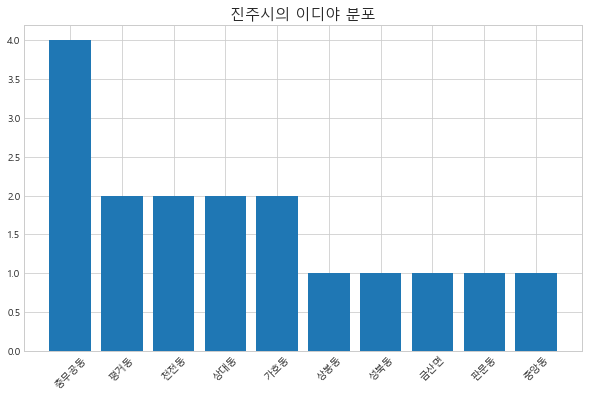

In [25]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.title("진주시의 이디야 분포", fontdict={"fontsize" : 15})
plt.bar(df_jinju_ediya['행정동명'].value_counts().index, df_jinju_ediya['행정동명'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

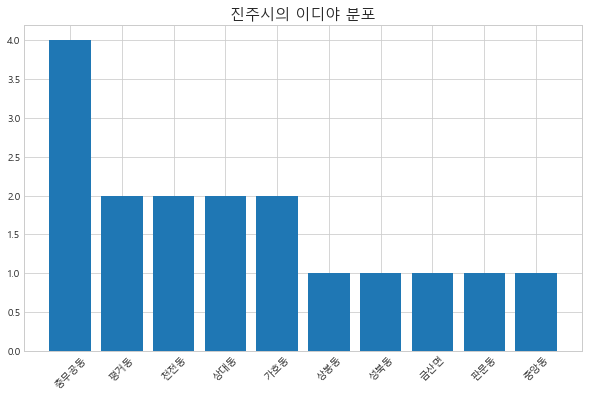

In [26]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.title("진주시의 이디야 분포", fontdict={"fontsize" : 15})
plt.bar(df_jinju_ediya['행정동명'].value_counts().index, df_jinju_ediya['행정동명'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

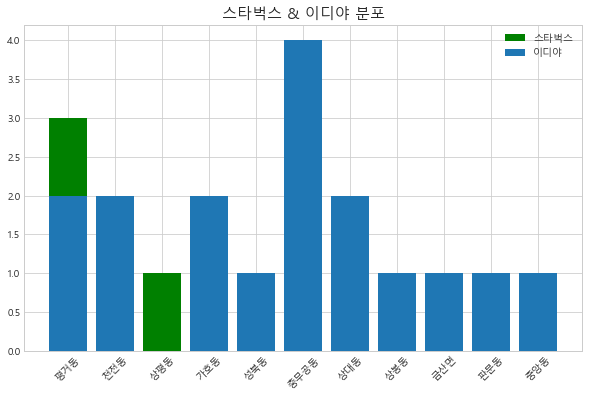

In [27]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.title("스타벅스 & 이디야 분포", fontdict={"fontsize" : 15})
plt.bar(df_jinju_starbucks['행정동명'].value_counts().index, df_jinju_starbucks['행정동명'].value_counts().values, color='green',label='스타벅스')
plt.bar(df_jinju_ediya['행정동명'].value_counts().index, df_jinju_ediya['행정동명'].value_counts().values,label='이디야')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [28]:
# 위치 파라미터 설정
loc = [35.179478182039595,128.1081199692995] # 위도(N), 경도(E)
data2_size = len(df_jinju_ediya)

# 지도 정의
map_ediya = folium.Map(location=loc, zoom_start=13)

# 포인트 마커 추가

for i in range(data2_size):

    folium.Marker(list(df_jinju_ediya.iloc[i][['위도', '경도']]),
                 popup=df_jinju_ediya.iloc[i][['지점명']],
                 icon=folium.Icon(color='blue')).add_to(map_ediya)

map_ediya

In [29]:
# 위치 파라미터 설정
loc = [35.179478182039595,128.1081199692995] # 위도(N), 경도(E)
data_size = len(df_jinju_starbucks)

map_starbucks = folium.Map(location=loc, zoom_start=13)
# 포인트 마커 추가

for i in range(data_size):

    folium.Marker(list(df_jinju_starbucks.iloc[i][['위도', '경도']]),
                 popup=df_jinju_starbucks.iloc[i][['지점명']],
                 icon=folium.Icon(color='green')).add_to(map_starbucks)

map_starbucks

In [30]:
# 위치 파라미터 설정
loc = [35.179478182039595,128.1081199692995] # 위도(N), 경도(E)

data_size = len(df_jinju_starbucks)
data2_size = len(df_jinju_ediya)

# 지도 정의
map = folium.Map(location=loc,
                 #tiles = 'Stamen Toner',
                 zoom_start=13)

# 포인트 마커 추가

for i in range(data_size):

    folium.Marker(list(df_jinju_starbucks.iloc[i][['위도', '경도']]),
                 popup=df_jinju_starbucks.iloc[i][['지점명']],
                 icon=folium.Icon(color='green')).add_to(map)


for i in range(data2_size):

    folium.Marker(list(df_jinju_ediya.iloc[i][['위도', '경도']]),
                 popup=df_jinju_ediya.iloc[i][['지점명']],
                 icon=folium.Icon(color='blue')).add_to(map)


map

In [31]:
# 위치 파라미터 설정
loc = [35.179478182039595,128.1081199692995] # 위도(N), 경도(E)

data_size = len(df_jinju_starbucks)
data2_size = len(df_jinju_ediya)

# 지도 정의
map = folium.Map(location=loc,
                 #tiles = 'Stamen Toner',
                 zoom_start=13)

# 포인트 서클 추가

for i in range(data_size):

    folium.Circle(list(df_jinju_starbucks.iloc[i][['위도', '경도']]),
                  radius = 300,
                  popup = df_jinju_starbucks.iloc[i]['지점명'],
                  color = '#2c9147',fill_color = '#2c9147').add_to(map)

for i in range(data2_size):

    folium.Circle(list(df_jinju_ediya.iloc[i][['위도', '경도']]),
                  radius = 300,
                  popup = df_jinju_ediya.iloc[i]['지점명'],
                  color = '#32408c',fill_color = '#32408c').add_to(map)

map

In [32]:
m.save("test.html")

In [33]:
#창원시 35.22752072958713,128.6817705092095

In [34]:
# 진주시 35.179478182039595,128.1081199692995

In [35]:
#pip install geopandas

In [36]:
import geopandas as gpd

pth = gpd.datasets.get_path("naturalearth_lowres")
world = gpd.GeoDataFrame.from_file(pth)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


C:\Users\User\anaconda3\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()


<AxesSubplot: >

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


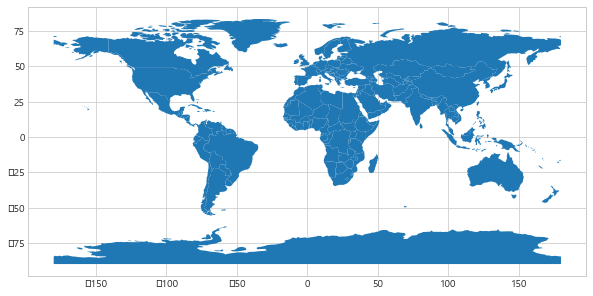

In [37]:
world.plot(figsize = (10,10))

C:\Users\User\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\User\anaconda3\lib\site-packages\geopandas\plotting.py:955: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


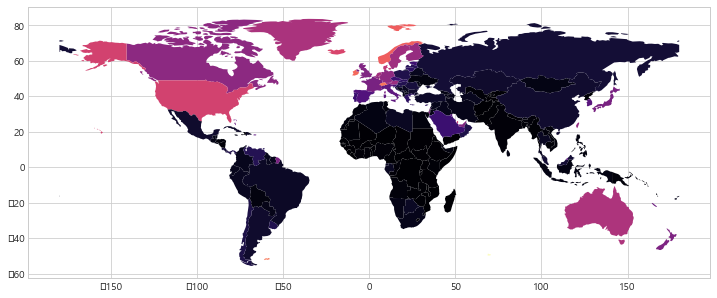

In [38]:
#import matplotlib.pyplot as plt
world =world[(world.pop_est> 0) & (world.name != 'Antarctica')]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column = 'gdp_per_cap',figsize= (15,5),cmap='magma')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\geopandas\plotting.py:955: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


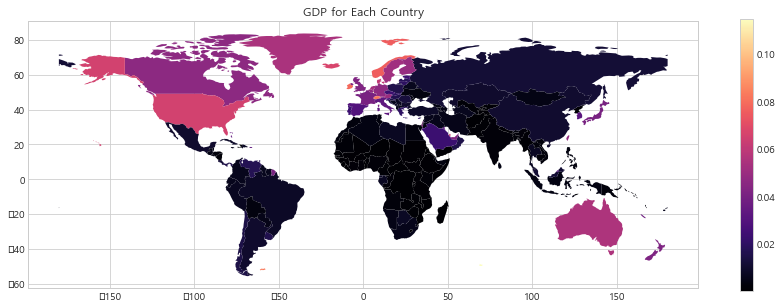

In [39]:
world =world[(world.pop_est> 0) & (world.name != 'Antarctica')]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column = 'gdp_per_cap' ,figsize= (15,5),cmap='magma', legend =True)
plt.title("GDP for Each Country")

plt.show()